In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data from the csv file
crimes_df = pd.read_csv(
    "../../data/clean/DelitosTipo1/DelitosTipo1-2010-2020.csv", index_col=0
)

# Convert the date column to datetime
crimes_df["Date"] = pd.to_datetime(crimes_df["Date"], format="%Y-%m")

In [3]:
Districs = list(crimes_df["Distrito"].unique())
Districs.sort()

### The following plots show how the data fype 1 offences is updated as a monthly cummulative value. This is why in the pre-processing step, the data was transformed into monthly deltas.fig.subplots_adjust(top=0.97) # Allowing space for the supertitle

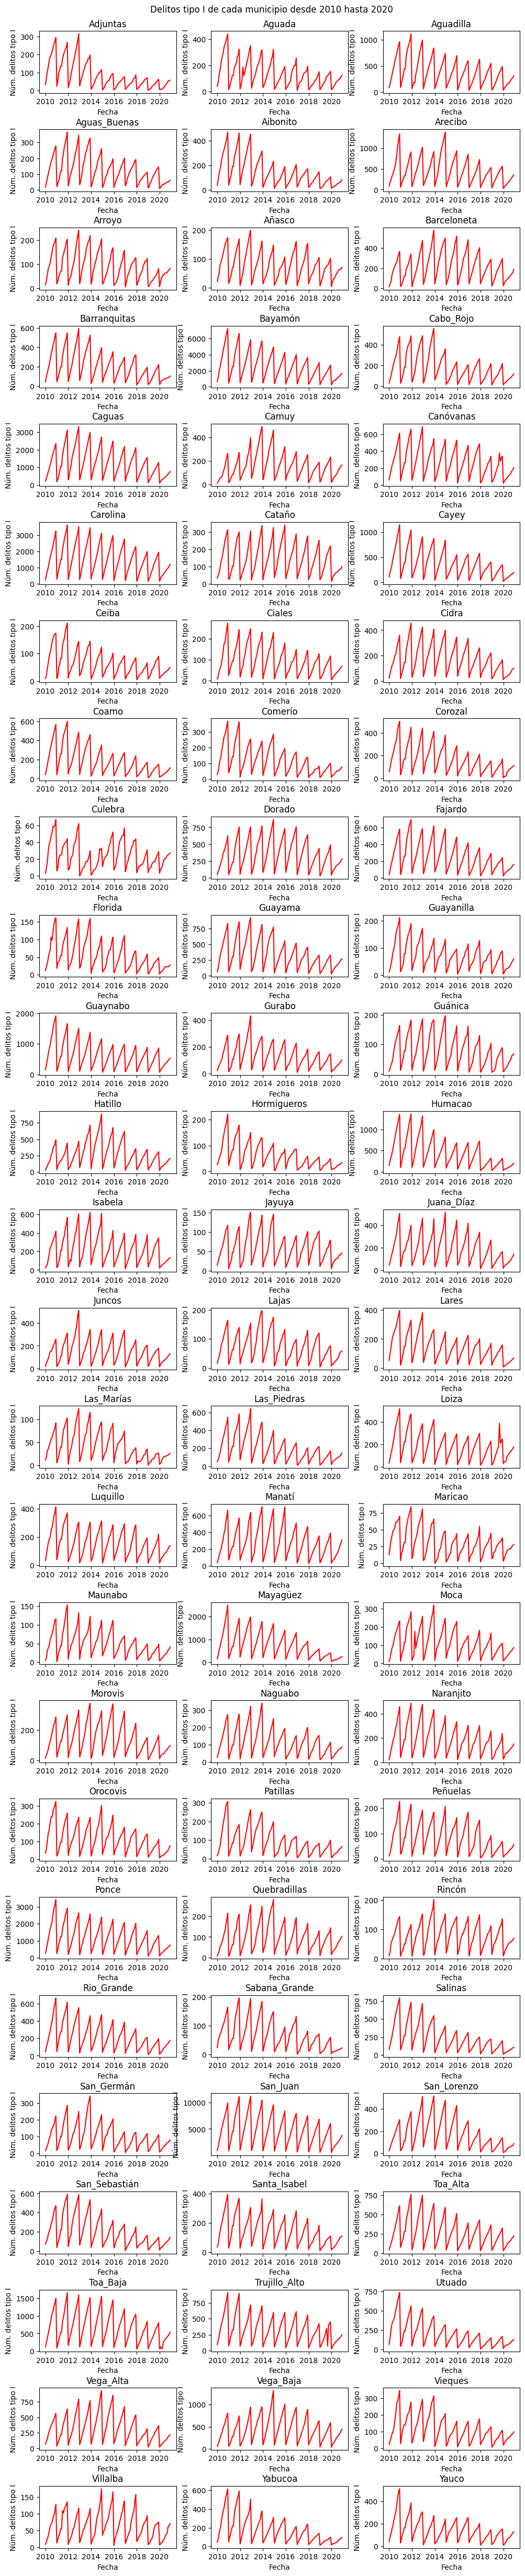

In [27]:
# Initializing figure space for subplots
row_count = 26
col_count = 3
fig, axs = plt.subplots(row_count, col_count, figsize=(10, 50))
fig.tight_layout(h_pad=3)  # adding a bit more vertical space


i = 0
y = 0
for distric in Districs:
    # plt.figure(figsize=(10, 10))
    distric_df = crimes_df[crimes_df["Distrito"] == str(distric)]
    distric_df_year_range = distric_df[distric_df["Date"] >= "2010-01-01"]

    # Set style settings before plotting data
    # plt.box(False)
    # plt.grid(True)
    # plt.xticks(rotation=45)

    # Plot the data

    # plt.plot(distric_df_year_range['Date'], distric_df_year_range['Tipo I'], color='red')
    # plt.title('Delitos tipo I en ' + str(distric) + ' de 2010 hasta 2020')
    # plt.xlabel('Fecha')
    # plt.ylabel('Número de delitos tipo I')

    # Save and show the plot
    distric = distric.replace(" ", "_")
    # plt.savefig('../../results/visual/crime_type1_plot_' + str(distric) + '.png')

    axs[i, y].plot(
        distric_df_year_range["Date"], distric_df_year_range["Tipo I"], color="red"
    )

    axs[i, y].set_title(str(distric))

    # Changing the ax to plot in for the next iteration.
    if y < col_count - 1:
        y += 1
    else:
        y = 0
        i += 1

    # plt.show()

for ax in axs.flat:
    ax.set(xlabel="Fecha", ylabel="Núm. delitos tipo I")

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

fig.subplots_adjust(top=0.97)  # Allowing space for the supertitle
fig.suptitle("Delitos tipo I de cada municipio desde 2010 hasta 2020")
plt.show()

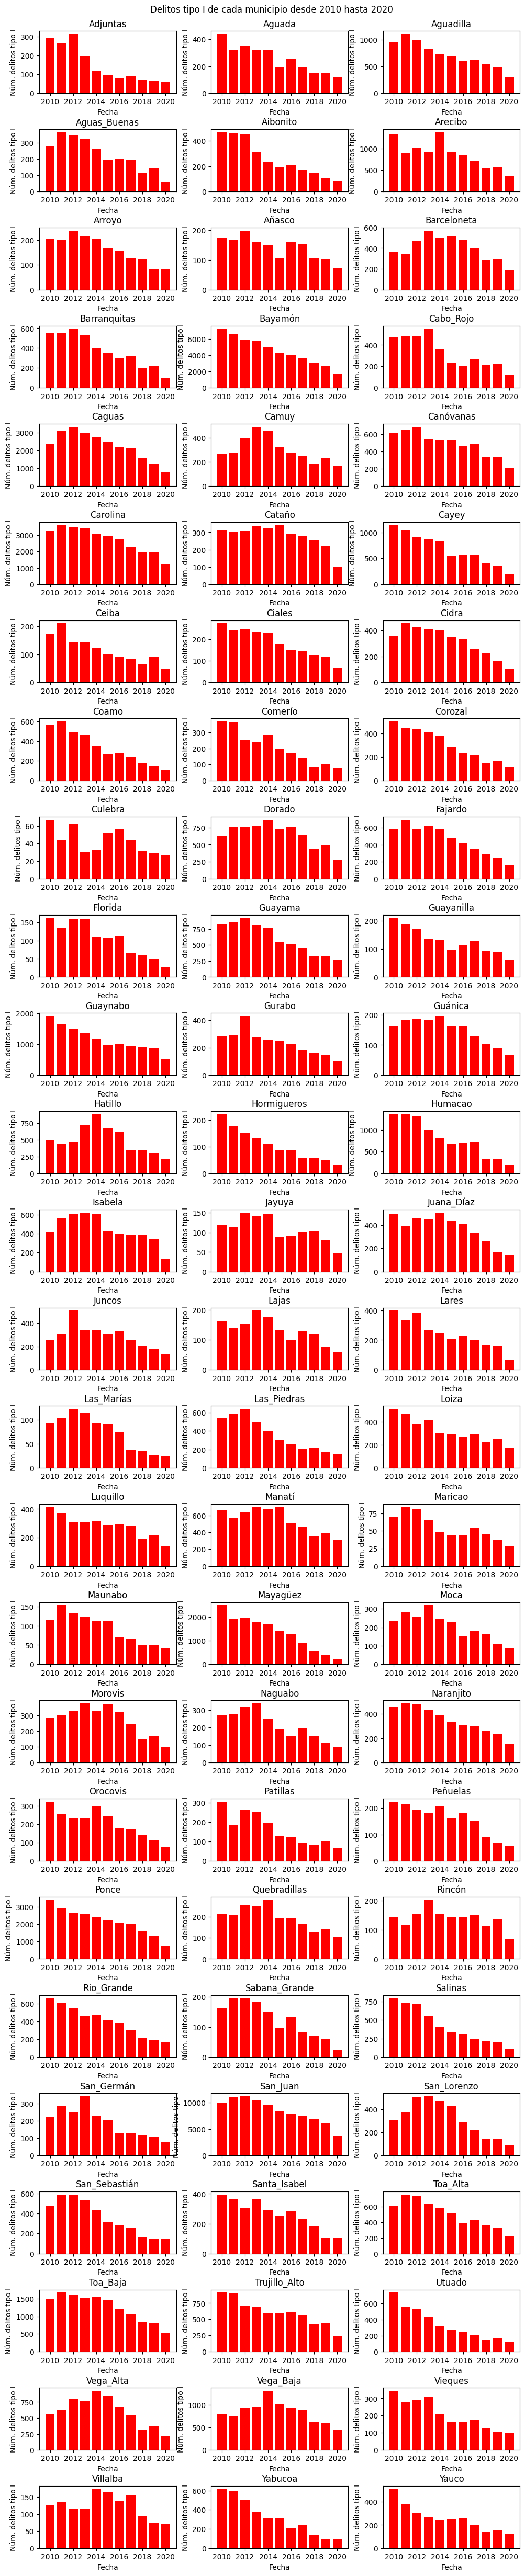

In [28]:
# Initializing figure space for subplots
row_count = 26
col_count = 3
fig, axs = plt.subplots(row_count, col_count, figsize=(10, 50))
fig.tight_layout(h_pad=3)  # adding a bit more vertical space

years = range(2010, 2021)


i = 0
y = 0
for distric in Districs:
    distric_df = crimes_df.loc[crimes_df["Distrito"] == distric]
    distric_df_yearly = distric_df.loc[distric_df["Date"].dt.month == 12]

    # Bar chart
    # fig, ax = plt.subplots()
    # fig.set_size_inches(10, 10)
    # ax.bar(years, height=distric_df_yearly.groupby('Date').sum()['Tipo I'], color='red')
    # ax.set_title(f'Delitos tipo I en {distric} desde 2010 hasta 2020')
    # ax.set_xlabel('Fecha')
    # ax.set_ylabel('Número de delitos tipo I')
    # ax.set_xticks(years)
    # ax.tick_params(axis='x', rotation=45)
    # replace spaces with an underscore
    distric = distric.replace(" ", "_")
    # plt.savefig(f'../../results/visual/crime_type1_barplot_{distric}.png')
    # plt.show()

    axs[i, y].bar(
        years, height=distric_df_yearly.groupby("Date").sum()["Tipo I"], color="red"
    )
    axs[i, y].set_title(str(distric))

    # Changing the ax to plot in for the next iteration.
    if y < col_count - 1:
        y += 1
    else:
        y = 0
        i += 1

for ax in axs.flat:
    ax.set(xlabel="Fecha", ylabel="Núm. delitos tipo I")

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

fig.subplots_adjust(top=0.97)  # Allowing space for the supertitle
fig.suptitle("Delitos tipo I de cada municipio desde 2010 hasta 2020")
plt.show()

# Analysis
The analysis shows that the towns with the highest crime rates are San Juan, Bayamon, and Guaynabo, which are part of the metropolitan area of San Juan. The trends in crime rates vary among towns, with some showing a downward trend after a peak in 2010, others showing a peak in 2015 followed by a downward trend, and most towns showing a sharp decrease in crime rates in 2019-2020, likely due to the pandemic. These trends may be useful for identifying correlations with other variables, such as population density, employment rate, etc. Additionally, some of the towns with a peak in 2015 are close to each other, indicating a common factor that could have influenced crime rates.

# Next steps
- Identify correlations between crime rate and other variables.
- Identify the common factor that could have affected the crime rate in 2015.
- Identify the common factor that could have affected the crime rate in 2010.
- Identify the common factor that could have affected the crime rate in 2019-2020.
- See if a particular type of crime is more common in some towns than others or if there is a common pattern.
